In [2]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)


In [6]:
##OneHotEncoding
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Number of classes', str(y_test.shape[0]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

Number of classes 10000


## LeNet Layers

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Activation

In [12]:
model = Sequential()

#2 Sets of CRP(Convolution Layer, Activation Layer, MaxPooling)
model.add(Conv2D(32, (5, 5), padding='same', input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#Fully Connected Layers
model.add(Flatten())
model.add(Dense(250, activation='relu'))

#Softmax For Classification
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
              optimizer = keras.optimizers.adadelta())
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [13]:
batch_size = 32
epochs = 15

history = model.fit(X_train, y_train, batch_size = batch_size, 
                    epochs = epochs, verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1036 - accuracy: 0.9669 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 2/15
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0278 - val_accuracy: 0.9906
Epoch 3/15
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0271 - val_accuracy: 0.9913
Epoch 4/15
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0215 - val_accuracy: 0.9923
Epoch 5/15
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 6/15
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0272 - val_accuracy: 0.9928
Epoch 7/15
60000/60000 [==============================] - 121s

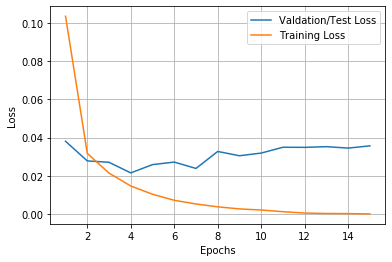

In [14]:
import matplotlib.pyplot as plt

history_dic = history.history

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Valdation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

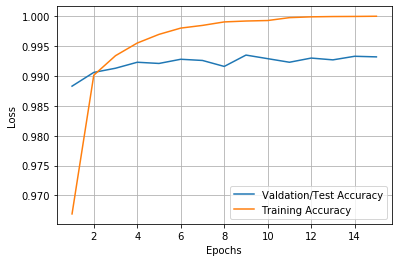

In [16]:
import matplotlib.pyplot as plt

history_dic = history.history

acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
epochs = range(1, len(acc_values)+1)

line1 = plt.plot(epochs, val_acc_values, label='Valdation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
model.save('./lenet-mnist.h5')

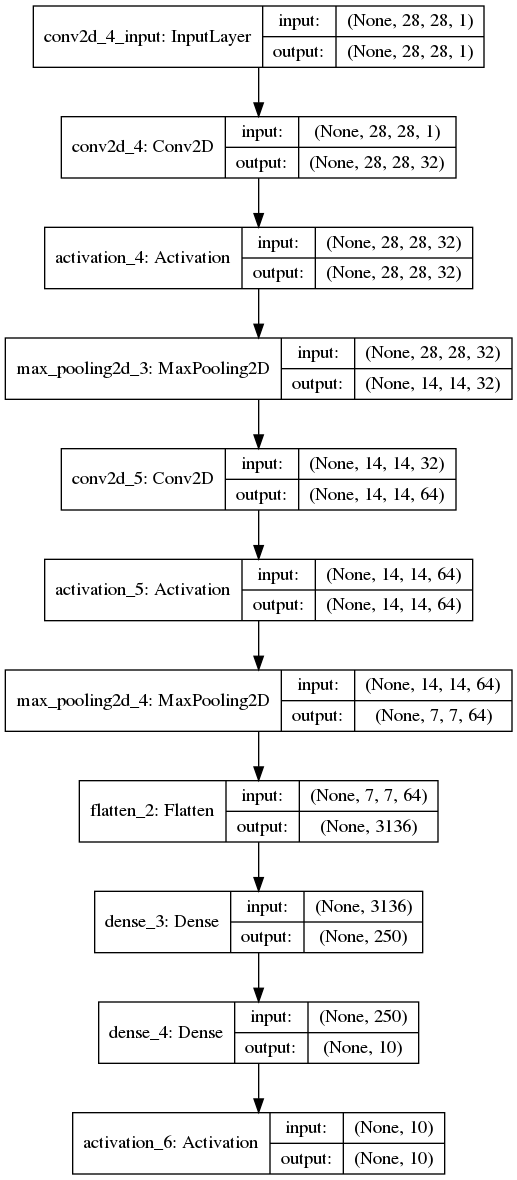

In [17]:
#sudo apt-get install graphviz
from keras.utils.vis_utils import plot_model

plot_model(model,
               to_file='lenet-mnist-model.png',
               show_shapes=True,
               show_layer_names=True,
               rankdir='TB')